In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go

data=pd.read_csv('online_shoppers_intention.csv')

In [2]:
missing= data.isnull().sum()
print(missing)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [3]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
x=data.iloc[:,[5,6]].values
x.shape

(12330, 2)

In [5]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,
             init='k-means++',
             max_iter=300,
             n_init=10,
             algorithm ='lloyd',
             tol=.001)
    km.fit(x)
    labels=km.labels_
    wcss.append(km.inertia_)

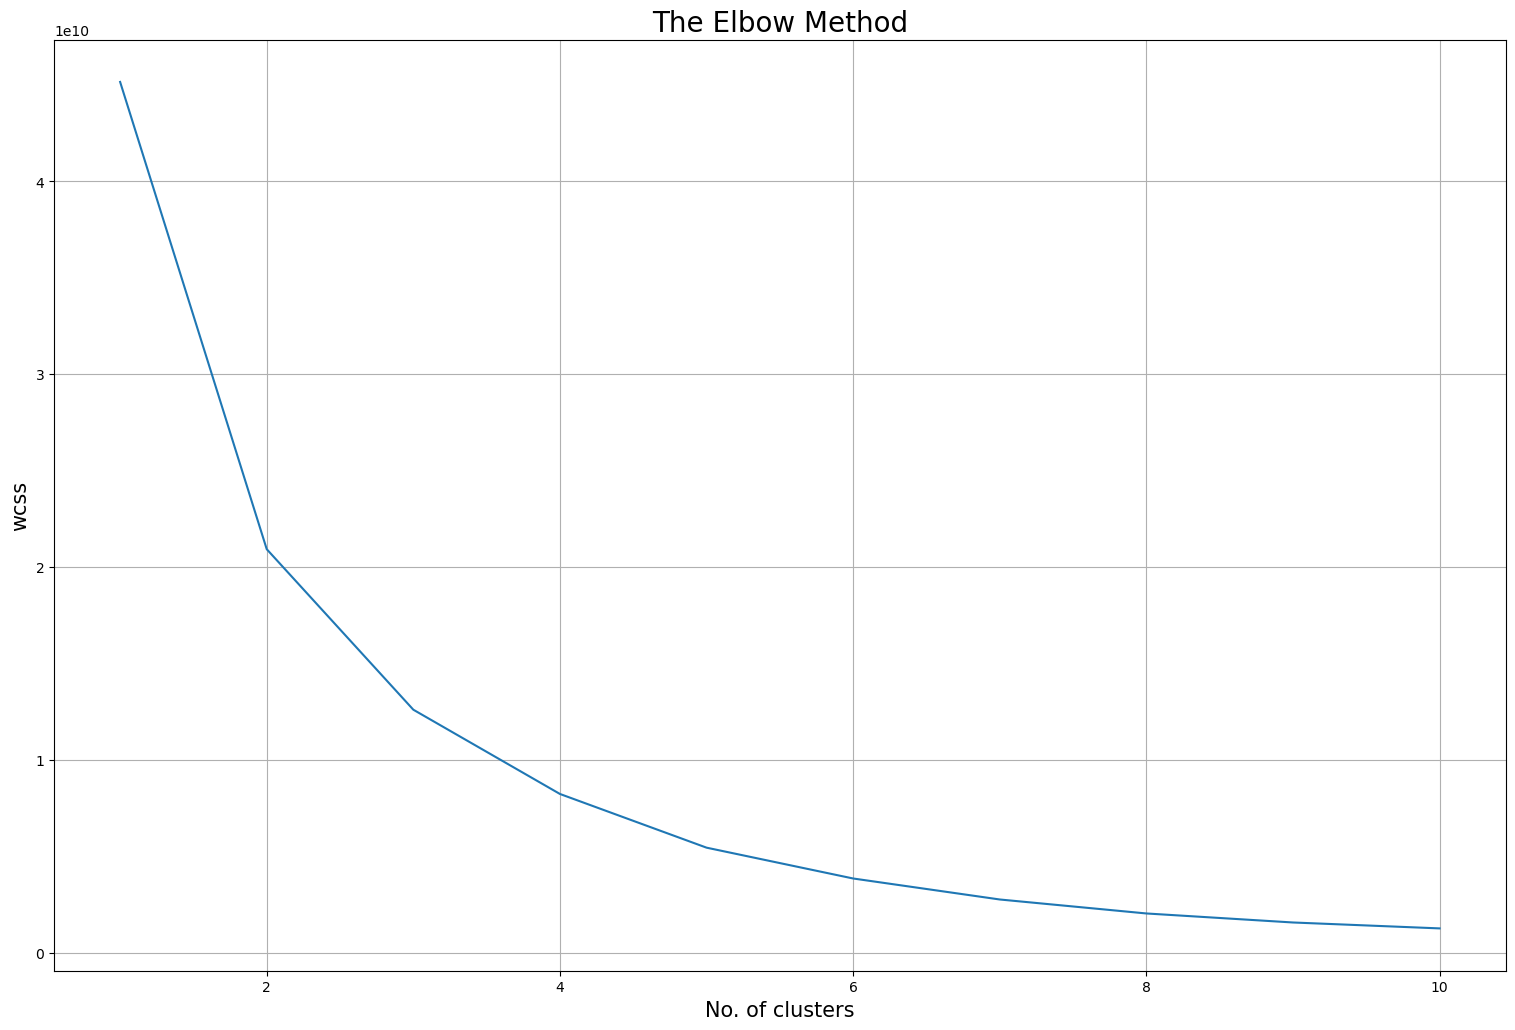

In [6]:
plt.rcParams['figure.figsize']=(15,10)
plt.plot(range(1,11),wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('No. of clusters',fontsize=15)
plt.ylabel("wcss",fontsize=15)
plt.show()

In [7]:
km=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=20)
km.fit(x)
y_means=km.predict(x)

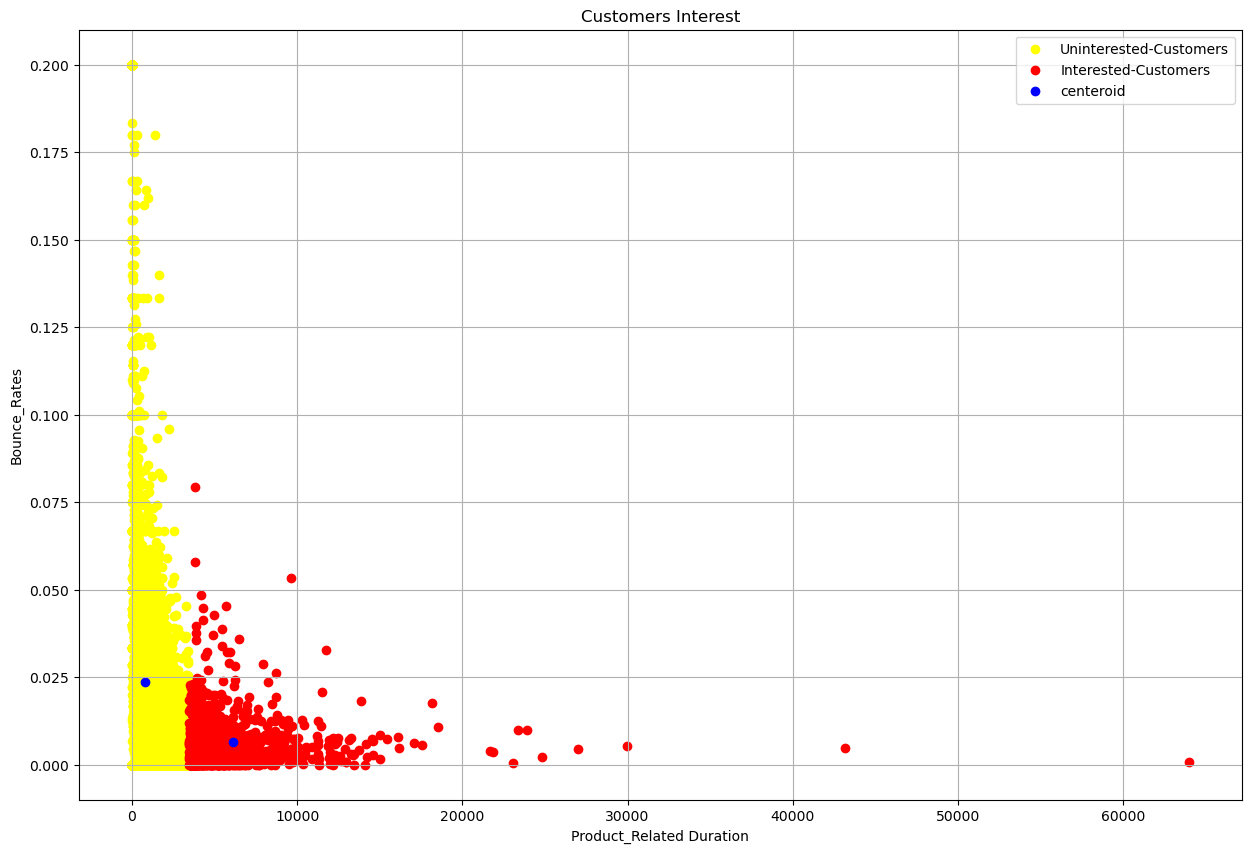

In [8]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],c='yellow',label='Uninterested-Customers')
plt.scatter(x[y_means==1,0],x[y_means==1,1],c='Red',label='Interested-Customers')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='Blue',label='centeroid')

plt.title('Customers Interest')
plt.xlabel('Product_Related Duration')
plt.ylabel('Bounce_Rates')
plt.legend()
plt.grid()
plt.show()

Adjusted rand index:  0.08359442469281096
accuracy score 0.8156528791565288


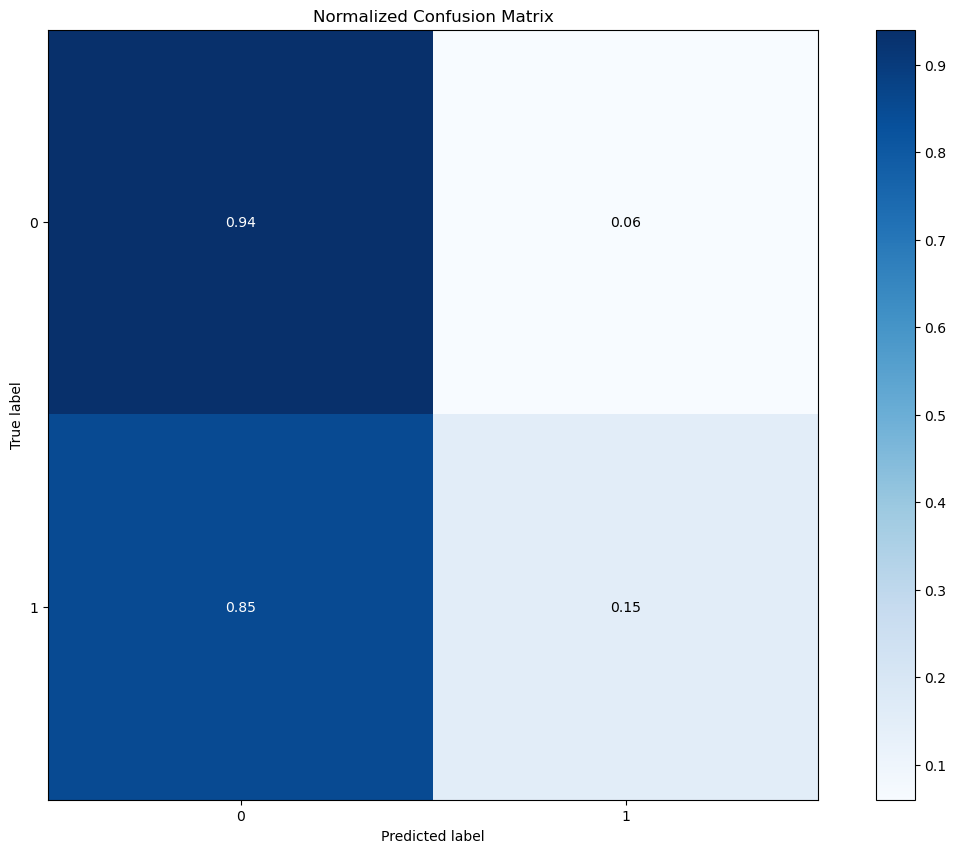

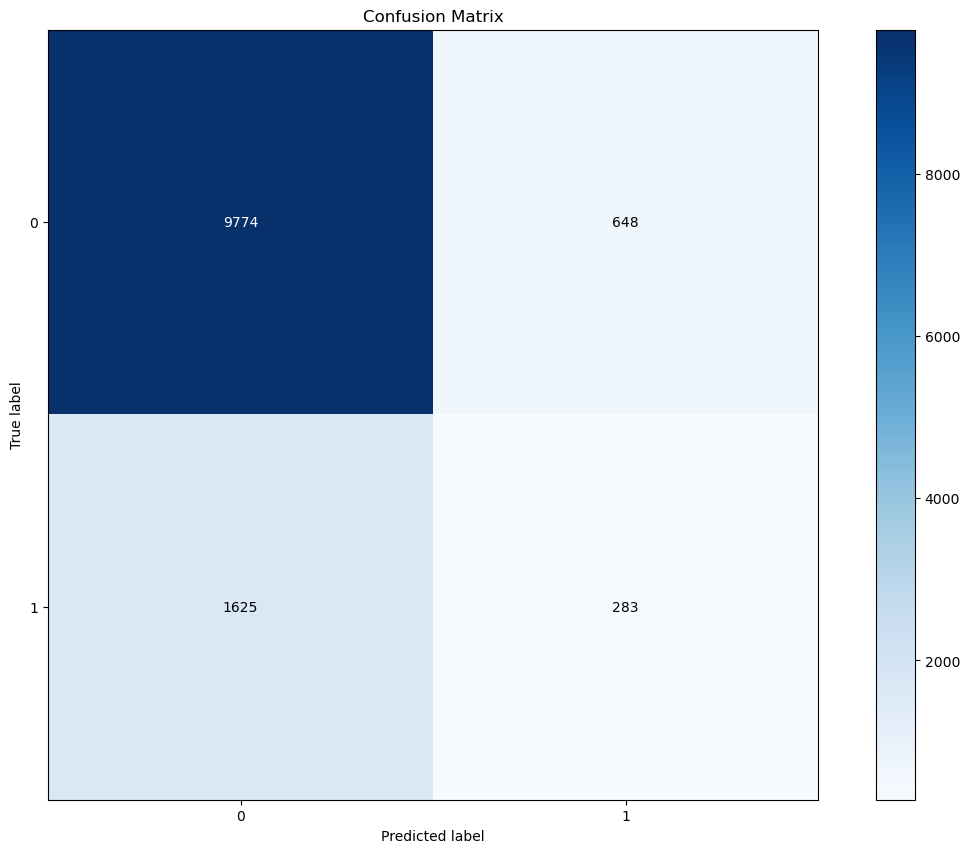

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels_true=le.fit_transform(data['Revenue'])

labels_pred=y_means

from sklearn import metrics
score=metrics.adjusted_rand_score(labels_true,labels_pred)
print('Adjusted rand index: ',score)
print('accuracy score',metrics.accuracy_score(labels_true,labels_pred))

import scikitplot as skplt
plt1=skplt.metrics.plot_confusion_matrix(labels_true,labels_pred,normalize=True)
plt2=skplt.metrics.plot_confusion_matrix(labels_true,labels_pred,normalize=False)

In [11]:
import pickle
pickle.dump(km,open("model.md5","wb"))

In [20]:
max(data['ProductRelated_Duration'])

63973.52223